# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# <h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm
import scipy.stats as stats
import math
import pylab
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading Data to understand before analysis

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [5]:
df.temperature.unique()

array([  99.3,   98.4,   97.8,   99.2,   98. ,   98.8,   98.6,   96.7,
         98.2,   98.7,   98.3,   97.2,   99.4,   98.1,   97.6,   98.5,
         99.5,   99.1,   97.9,   96.4,   96.9,   99. ,   97.4,   97.1,
         98.9,   97.7,   97.5,  100. ,   96.8,   99.9,   97. ,   97.3,
        100.8,   96.3])

### 1. Is the distribution of body temperatures normal? 

#### Answer is Yes. Please see below analysis

Let's construct a histogram and visually check if the distribution follows a Normal curve.

In [6]:
temp_obs = df.temperature.sort_values()

In [7]:
bin_values = np.arange(start=temp_obs.min(), stop=temp_obs.max(), step=.05)

In [8]:
mu, std = temp_obs.mean(),temp_obs.std()

In [9]:
p=norm.pdf(temp_obs,mu,std)

Text(0.5,1,'Distribution of Temperature Mean:98.249 *** Std.Dev:0.7331 *** Mode:98.0')

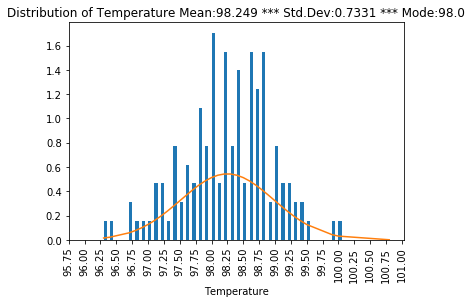

In [10]:
plt.hist(temp_obs,bins=bin_values,density=True,stacked=True)
plt.plot(temp_obs, p)
plt.xlabel('Temperature')
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.title(('Distribution of Temperature Mean:'+('{:3.6}'.format(str(mu)))+
           ' *** Std.Dev:'+('{:1.6}'.format(str(std)))+
          ' *** Mode:'+('{:3.6}'.format(str(temp_obs.mode().values[0])))))

Now, let us check if the observations follow a Normal distribution using normaltest from 

In [11]:
k2,p=stats.normaltest(temp_obs)
if p < 0.05:
    print("Not Normal Distribution")
else:
    print("Normal Distribution")

Normal Distribution


###### So based on the p values, we can say that distribution is normal.

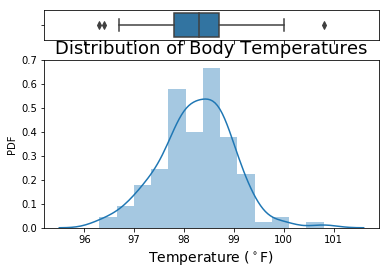

In [12]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for temperature:
sns.boxplot(df.temperature, ax=boxplot)

# Add histogram for temperature:
sns.distplot(df.temperature, ax=histogram)

# Label axes and add title:
plt.xlabel('Temperature ($^\circ$F)', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Body Temperatures', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Display the plots:
plt.show()

### 2. Is the sample size large? Are the observations independent?

In [13]:
len(df)

130

Sample size > 30 and sufficiently large for CLT(central limit theorem). Samples are independent because they are taken from different people.

In [14]:
df[df.temperature.isnull()]

,temperature,gender,heart_rate


As we can see from the above results, there are 130 observations in the given dataset. It is generally accepted that if a sample has more than 30 observations, the sample is large. So in this case, the sample size is large.

Each random variable in this sample and population measures the temperature of a human and are independent observations.

### 3. Is the true population mean really 98.6 degrees F? 


###### Questions for my analysis

###### Would we use a one-sample or two-sample test? Why? 
###### In this situation, is it appropriate to use the t or z statistic? 
###### Now try using the other test. How is the result be different? Why?

Ho: True Population Mean is 98.6 F

H1: True Population Mean is not 98.6 F

One sample test is appropriate to use since a set of temperatures will be tested against the population mean of 98.6 F. Z-statistic is appropriate to use in this case since sample size > 30. If calculated p_value is < assumed p_value of 0.05, then Ho will be rejected.

In [15]:
mean=df.temperature.mean()
print('Mean',mean)

std=df.temperature.std()
print('Std Dev',std)

median=df.temperature.median()

print('Median',median)

sample_size=df.temperature.size

print('Sample Size',mean)

signal=mean-98.6

print('Signal',signal)

noise=std/(sample_size**0.5)

print('Noise',noise)

z_val=signal/noise

print('Z Value ',z_val)

Mean 98.24923076923078
Std Dev 0.7331831580389454
Median 98.3
Sample Size 98.24923076923078
Signal -0.35076923076921673
Noise 0.06430441683789101
Z Value  -5.454823292364079


###### This tells us that sample mean of 98.25 F is 5.18 standard error units  below the assumed population mean of 98.6 F

In [16]:
# Probability that True Mean is within 5.45 std of 98.25 F

P_value=stats.norm.cdf(z_val) * 2 # two sided
P_value

4.9021570141133797e-08

In [17]:
P_value=stats.norm.sf(abs(z_val))*2 #twosided same formula as In[60]

In [18]:
P_value

4.9021570141133797e-08

In [19]:
if P_value<0.05:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True.  True Population mean is 98.6 F.')

Ho must be rejected. True Population Mean is NOT 98.6 F


#Comparing Z-statistic and t-statistic

In [20]:
#Calculate critical t-value
# n=130, df=129, p<0.05, 2-tail
critical_t=stats.t.ppf(1-0.025, 129)
critical_t

1.9785244914586051

In [21]:
moe_t=critical_t*std/np.sqrt(130)
moe_t

0.12722786362273045

In [22]:
#Calculate critical z-value
# CI=95%, 2-tail= CI=97.5%, 1-tail
critical_z=stats.norm.ppf(0.975)
critical_z

1.959963984540054

In [23]:
moe_z=std*critical_z/np.sqrt(130)
moe_z

0.1260343410491174

In [24]:
# Range of true mean using z-statistic with 95% confidence level
mean_z1=mean+moe_z
mean_z2=mean-moe_z

In [25]:
# Range of true mean using t- statistic with 95% confidence level, n=130 so degrees of freedom=129
mean_t1=mean+moe_t
mean_t2=mean-moe_t

#True Mean Range using z-statistic

In [26]:
print("Using z-statistic with 95% confindence level, range of true mean is ", round(mean_z2,2), " F to ", round(mean_z1,2), " F.")

Using z-statistic with 95% confindence level, range of true mean is  98.12  F to  98.38  F.


In [27]:
print("Using t-statistic with 95% confindence level, range of true mean is ", round(mean_t2,2), " F to ", round(mean_t1,2), " F.")

Using t-statistic with 95% confindence level, range of true mean is  98.12  F to  98.38  F.


This range is the same since sample size of 130 is sufficiently large. For n > 30 results for z-statistic and t-statistic will yield same results

### 4. Draw a Sample of Size 10 from the Data and Repeat Both Tests

- Which one is the correct one to use?



- What is noticeable? What does this say about the difference in application of the t and z statistic?

This test meets the criteria for a t-test: the population standard deviation is unkown and the sample size is small.

In [28]:
# Seed the random number generator:
np.random.seed(15)


# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)
sample

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [29]:
# Save results of a one sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.68826445858
p-value: 0.0248671106512


In [30]:
# Calculate and save z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -2.83367954733
p-value: 0.0046015450048


In [31]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

-2.26215716274 2.26215716274


In [32]:
# Print the quantiles of the t-distribution corresponding to
# confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-4.78091258593 4.78091258593


The test statistic falls outside the t-distribution corresponding to a 95% confidence level, but not 99.9%. The p-value for the z-test is below both significance levels, but the p-value for the t-test indicates significance only at the 95% level. Both tests provide evidence to reject the null hypothesis. The difference in results reflects the nature of the two distributions. The t-distribution is wider so there is more variability. This makes the t-test less sensitive.

### 5. At what value is one's temperature considered 'abnormal'?

###### Start by computing the margin of error and confidence interval. 

In [33]:
moe_z = 1.96 * std/ np.sqrt(130)

In [34]:
ci = mean + np.array([-1, 1]) * moe_z
ci

array([ 98.12319411,  98.37526743])

In [35]:
print("Normal temperature range is ", round(mean_z2,2), " F to ", round(mean_z1,2), " F. Outside this range is ABNORMAL!")

Normal temperature range is  98.12  F to  98.38  F. Outside this range is ABNORMAL!


That means 98.6 F is considered ABNORMAL

Text(0.5,1,'Normal Human Body Temperature')

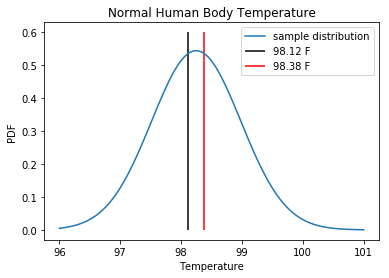

In [36]:
x = np.linspace(96,101,130)
y = stats.norm.pdf(x, loc=mean, scale=std)    
pylab.plot(x,y)

pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(mean_t2,0, 0.6)
pylab.vlines(mean_t1,0,0.6,color='red')

pylab.legend(['sample distribution','98.12 F', '98.38 F'])
pylab.title('Normal Human Body Temperature')


### 6.  Is there a significant difference between males and females in normal temperature? 

#What test did you use and why? 
#Write a story with your conclusion in the context of the original problem.

It is best to use a **permutation test** since it exactly simulates the null hypothesis. A **two-sample t-test** is also appropriate since the means of two independent samples are compared. First, some graphical data analysis:

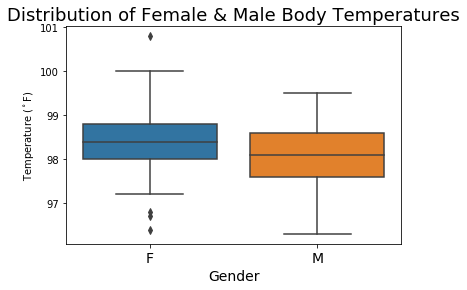

In [37]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=14)
fig = plt.xlabel('Gender', fontsize=14)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [38]:
##Male Temperatures
men=df[df.gender=='M']
men.shape

(65, 3)

In [39]:
men_mean_temp=men.temperature.mean()
men_mean_temp

98.1046153846154

In [40]:
men_std_temp=men.temperature.std()
men_std_temp

0.6987557623265908

In [41]:
##Female Temperatures
fem=df[df.gender=='F']
fem.shape

(65, 3)

In [42]:
fem_mean_temp=fem.temperature.mean()
fem_mean_temp

98.39384615384613

In [43]:
fem_std_temp=fem.temperature.std()
fem_std_temp

0.7434877527313665

In [44]:
## Diference in mean of Male and Female temperatures
mean_diff=fem_mean_temp - men_mean_temp
mean_diff

0.289230769230727

In [45]:
## Standard Error Calculation
SE=((men_std_temp**2)/65 + (fem_std_temp**2)/65)**0.5
SE

0.12655395041982642

In [46]:

## Degrees of Freedom Calculation
F1=fem_std_temp**2/65
M1=men_std_temp**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.5103008303909

In [47]:

## Use 0.05 Significance level in two sample t-test
t_val=((fem_mean_temp-men_mean_temp)-0)/SE
t_val

2.285434538165274

In [48]:
p_value = stats.t.sf(np.abs(2.29), 128)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

0.023657711289024146

In [49]:
if p_value<0.05:
    print('Ho that mean of female and male temperature are the same will be rejected.')
    print('There is significance difference between male and female body temperatures.')
else: 
    print('Ho: Mean of female and amle temperature are the same IS TRUE!')

Ho that mean of female and male temperature are the same will be rejected.
There is significance difference between male and female body temperatures.


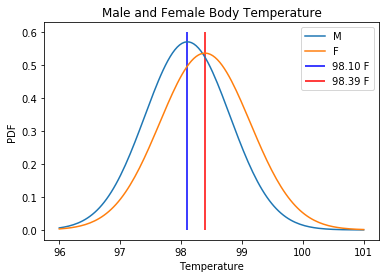

In [50]:
##Normal Distribution graph of Male and Female Temperatures
x = np.linspace(96,101,130)
y1 = stats.norm.pdf(x, loc=men_mean_temp, scale=men_std_temp)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=fem_mean_temp, scale=fem_std_temp)    
pylab.plot(x,y2)
pylab.xlabel('Temperature')
pylab.ylabel('PDF')
pylab.vlines(men_mean_temp,0, 0.6, color='blue')
pylab.vlines(fem_mean_temp,0,0.6, color='red')
pylab.legend(['M', 'F', '98.10 F', '98.39 F'])
pylab.title('Male and Female Body Temperature')
pylab.show()

### Conclusion:

We find that human tempature is close to normal distributed, we also concluded that although the mean body tempature was thought to be 98.6, this is not true according to the p values test we conducted on the tempature dataset. We then conduct another A/B test to conclude that there is a significant difference between males and females in normal temperature.